## **Load libraries and data**

In [62]:
#!pip install --upgrade pythainlp
#!pip install pyLDAvis

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


import pythainlp
from pythainlp.tokenize import sent_tokenize, word_tokenize
import gensim

# import tensorflow_hub as hub
# import tensorflow_text
# import tensorflow as tf

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [38]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')

mpl.rc('font', family='TH Sarabun New', size=12, weight=500)

In [39]:
df = pd.read_csv('Wongnai Reviews - Small.csv')

In [40]:
df.tail()

,Review ID,Review
295,296,ค่ำนี้คุณเพื่อนอยากส้มตำ หมูเฮาเลยพากันลงมากิน...
296,297,ร้านสะอาดดี ตกแต่งสวยงาม มีที่จอดรถ ราคาเมนูต่...
297,298,เช้าๆ รีบๆ วิ่งมาเข่าห้องเรียนแทบไม่ทันแต่ต้อง...
298,299,ร้านนี้เป็นร้านกาแฟเล็กๆ ข้างๆ ร้านๆ Happy Man...
299,300,ทรูคอฟฟี่สาขาซีคอนอยู่ในศูนย์บริการของทรู ชั้น...


## **Tokenize Words**

In [41]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', '  ', '\n', 'ร้าน', '(', ')','ๆ','-','–','.',',','{','}',':',';','/','>','<','"']
screening_words = stopwords + removed_words

def tokenize_sentence(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine='newmm')
  for word in words:
    if word not in screening_words:
      if merged == '':
        merged = word
      else:
        merged = merged + ',' + word
  return merged

In [42]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_sentence(x))

In [43]:
df.tail()

,Review ID,Review,Review_tokenized
295,296,ค่ำนี้คุณเพื่อนอยากส้มตำ หมูเฮาเลยพากันลงมากิน...,"ค่ำ,เพื่อน,ส้มตำ,หมู,เฮา,ลงมา,กิน,ส้มตำ,ออฟฟิศ..."
296,297,ร้านสะอาดดี ตกแต่งสวยงาม มีที่จอดรถ ราคาเมนูต่...,"สะอาด,ดี,ตกแต่ง,สวยงาม,ที่จอดรถ,ราคา,เมนู,เทีย..."
297,298,เช้าๆ รีบๆ วิ่งมาเข่าห้องเรียนแทบไม่ทันแต่ต้อง...,"เช้า,รีบ,วิ่ง,เข่า,ห้องเรียน,แทบ,ต้องหา,ของกิน..."
298,299,ร้านนี้เป็นร้านกาแฟเล็กๆ ข้างๆ ร้านๆ Happy Man...,"ร้านกาแฟ,Happy,Mango,อาทิตย์,นัด,เพื่อน,นั่ง,ค..."
299,300,ทรูคอฟฟี่สาขาซีคอนอยู่ในศูนย์บริการของทรู ชั้น...,"ทรู,คอ,ฟ,ฟี่,สาขา,ซีคอน,ศูนย์,บริการ,ทรู,ชั้น,..."


## **Create Dictionary**

In [44]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [45]:
print(dictionary.token2id.keys())

dict_keys(['20', 'Macchiato', 'กาแฟ', 'กาแฟร้อน', 'กิน', 'คน', 'ครึ่ง', 'ความคิด', 'ชอบ', 'ดื่ม', 'ตอน', 'ทาน', 'นึง', 'บาท', 'ปริมาณ', 'มีความสุข', 'ลา', 'สั่ง', 'หนัก', 'หลังจากนี้', 'เข้าไป', 'เจอ', 'เดิน', 'เดิม', 'เป็นประจำ', 'เฟล', 'แก้ว', 'โบราณ', 'Art', 'Coffee', 'Kasetsart', '^^', 'of', 'คาราเมล', 'คิ', 'ชา', 'ซ', 'ซี', 'ดี', 'นั่ง', 'น่ารัก', 'บรรยากาศ', 'พนักงาน', 'พูดจา', 'มัค', 'รสชาติ', 'ราคา', 'ร้านกาแฟ', 'ลอน', 'ลาเต้', 'ลูกค้า', 'อัธยาศัย', 'อัสสัม', 'อา', 'อิตาเลียน', 'อุดหนุน', 'เพรส', 'เมนู', 'เยี่ยม', 'เอ๊กซ์', 'แพง', 'โซดา', 'โซ่', 'โต้', 'ไอ', 'ไอซ์', '555', 'กก', 'กรอบ', 'กระ', 'กระทะ', 'กร๊อบ', 'กลิ่น', 'กวง', 'กะ', 'กินน้ำ', 'กุ้ง', 'ก้น', 'ข้าวผัด', 'ข้าวเหนียว', 'ความสนใจ', 'คอ', 'คาว', 'งั้น', 'งี้', 'จริ๊ง', 'จัดจ้าน', 'จาน', 'จี๊ดจ๊าด', 'จ้น', 'จ้ิม', 'จ๊อบ', 'ฉ่า', 'ชิม', 'ชุ่มคอ', 'ดาว', 'ตบท้าย', 'ตัก', 'ถูกใจ', 'ทอด', 'ทะเล', 'ทีหลัง', 'นานา', 'นุ่ม', 'น้ำ', 'น้ำปลา', 'บรรยาย', 'ปลา', 'ปลาหมึก', 'ปาก', 'ปู', 'ปูม้า', 'ผสม', 'ผัด', 'พง', 'พริก', 'พลาด'

In [46]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

In [47]:
print(word_frequencies)

[[('20', 1), ('Macchiato', 2), ('กาแฟ', 1), ('กาแฟร้อน', 1), ('กิน', 1), ('คน', 1), ('ครึ่ง', 1), ('ความคิด', 1), ('ชอบ', 1), ('ดื่ม', 1), ('ตอน', 1), ('ทาน', 1), ('นึง', 1), ('บาท', 1), ('ปริมาณ', 1), ('มีความสุข', 1), ('ลา', 1), ('สั่ง', 1), ('หนัก', 1), ('หลังจากนี้', 1), ('เข้าไป', 1), ('เจอ', 1), ('เดิน', 1), ('เดิม', 1), ('เป็นประจำ', 1), ('เฟล', 2), ('แก้ว', 2), ('โบราณ', 1)], [('สั่ง', 1), ('Art', 1), ('Coffee', 1), ('Kasetsart', 1), ('^^', 1), ('of', 1), ('คาราเมล', 1), ('คิ', 1), ('ชา', 2), ('ซ', 1), ('ซี', 1), ('ดี', 1), ('นั่ง', 1), ('น่ารัก', 1), ('บรรยากาศ', 1), ('พนักงาน', 1), ('พูดจา', 1), ('มัค', 1), ('รสชาติ', 1), ('ราคา', 1), ('ร้านกาแฟ', 1), ('ลอน', 1), ('ลาเต้', 1), ('ลูกค้า', 1), ('อัธยาศัย', 1), ('อัสสัม', 1), ('อา', 1), ('อิตาเลียน', 1), ('อุดหนุน', 1), ('เพรส', 1), ('เมนู', 1), ('เยี่ยม', 1), ('เอ๊กซ์', 1), ('แพง', 1), ('โซดา', 1), ('โซ่', 1), ('โต้', 1), ('ไอ', 1), ('ไอซ์', 1)], [('กิน', 5), ('คน', 2), ('ชอบ', 1), ('ตอน', 1), ('ทาน', 3), ('นึง', 1), ('สั่ง', 3

## **Topic Modeling**

In [48]:
num_topics = 10
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 9.12 s, sys: 54 ms, total: 9.17 s
Wall time: 10.4 s


In [49]:
pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.003540 -0.009887       1        1  13.585455
0      0.015655  0.055843       2        1  13.434762
7      0.062750 -0.033417       3        1  13.044277
6     -0.023452 -0.019699       4        1  11.562486
9     -0.010241  0.004801       5        1  11.111094
1     -0.034540 -0.022881       6        1   9.731254
2     -0.001184  0.010675       7        1   8.727552
8     -0.002484  0.007907       8        1   7.654208
3      0.000260  0.010986       9        1   6.822057
5     -0.003224 -0.004329      10        1   4.326854, topic_info=        Term        Freq       Total Category  logprob  loglift
2       กาแฟ  297.000000  297.000000  Default  30.0000  30.0000
573     เค้ก  117.000000  117.000000  Default  29.0000  29.0000
35        ชา  237.000000  237.000000  Default  28.0000  28.0000
907   ไข่มุก   85.000000   85.000000  Default  27.0000  27.0000
1305     พาย   14.000000   14.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
607    เลือก    5.689360  125.242176  Topic10  -5.5720   0.0487
13       บาท    6.537279  230.316211  Topic10  -5.4331  -0.4216
39      นั่ง    6.268809  192.903250  Topic10  -5.4750  -0.2863
407       ดู    5.451726  142.955261  Topic10  -5.6147  -0.1263
87       จาน    5.440349  185.940083  Topic10  -5.6168  -0.3913

[765 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3684     10  0.688989         
4229      6  0.526150      "พร
1108      1  0.117272        +
1108      2  0.381135        +
1108      3  0.117272        +
...     ...       ...      ...
5791      4  0.492925   ์กช้อค
5873      7  0.524492        ๑
4643      3  0.861632        •
2122      7  0.529222        ′
2123      7  0.527903        ″

[1584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 7, 10, 2, 3, 9, 4, 6])

In [50]:
model.show_topic(3)

[('กาแฟ', 0.01652432),
 ('อร่อย', 0.012743609),
 ('ทาน', 0.0115683945),
 ('อาหาร', 0.00980742),
 ('รสชาติ', 0.009546527),
 ('สั่ง', 0.009162223),
 ('ชา', 0.008871187),
 ('ดี', 0.00848387),
 ('ราคา', 0.008245991),
 ('เมนู', 0.007847184)]

In [51]:
result = []
topn = 15

for n in range(num_topics):
    temp_df = pd.DataFrame(model.get_topic_terms(n, topn=topn), columns=['word_id','prob'])
    temp_df['topic'] = n
    result.append(temp_df)

topic_terms_df = pd.concat(result)
topic_terms_df['word'] = topic_terms_df['word_id'].apply(lambda x: dictionary.get(x))
topic_terms_df.head()

,word_id,prob,topic,word
0,11,0.016883,0,ทาน
1,35,0.015100,0,ชา
2,156,0.014017,0,อร่อย
3,45,0.013679,0,รสชาติ
4,38,0.012793,0,ดี


In [52]:
topic_terms_df['word'].unique()

array(['ทาน', 'ชา', 'อร่อย', 'รสชาติ', 'ดี', 'นม', 'บาท', 'เมนู', 'ราคา',
       'ไข่มุก', 'อาหาร', 'ชอบ', 'สั่ง', 'กาแฟ', 'หวาน', 'กิน', 'คน',
       'จาน', 'ผม', 'นั่ง', 'ลอง', 'เค้ก', 'พาย', 'รส', 'หอม', 'นะคะ',
       'บรรยากาศ', 'ดู'], dtype=object)

In [53]:
topic_terms_df.to_pickle('topic_term.pkl')

In [54]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [55]:
df[df['topics'] == 3]

,Review ID,Review,Review_tokenized,topics,score
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,"คน,ชอบ,ทาน,Macchiato,เป็นประจำ,นึง,เดิน,เข้าไป...",3,0.991730
7,8,Starbucks \nเกี่ยวกับร้าน: \nร้าน Starbucks นี...,"Starbucks,Starbucks,Central,เชียงราย,ชั้น,1,บร...",3,0.998142
32,33,ร้านกาแฟนรสิงห์ ณ วังพญาไท\n\nได้ยินชื่อร้านกา...,"ร้านกาแฟ,นรสิงห์,วัง,พญาไท,ได้ยิน,ชื่อ,ร้านกาแ...",3,0.998695
37,38,ร้านใหม่พึ่งเปิดได้ 3 เดือน เลยมาลองดู ไม่ผิดห...,"3,เดือน,ลองดู,ผิดหวัง,ลอง,coffee,jelly,iced,dr...",3,0.994023
83,84,การไปกินเริ่มจากอากาศร้อนเลยไปหาที่นั่งเล่นชิล...,"กิน,อากาศ,ร้อน,ไปหา,นั่งเล่น,ชิล,คนแนะนำ,ตั้งอ...",3,0.996966
97,98,ร้านวโรชา เป็นร้านก๋วยเตี๋ยวเล็กๆ ที่เปิดมานาน...,"ร้า,นว,โร,ชา,ก๋วยเตี๋ยว,บริเวณ,ซอย,เอกมัย,12,ม...",3,0.994528
103,104,เกี่ยวกับร้าน Near River Golden triangle: \nร้...,"Near,River,Golden,triangle,ท่า,จอด,รถ,สามเหลี่...",3,0.997849
108,109,บ้านไร่กาแฟอยู่ตรงBTS เอกมัย ร้านใหญ่พอสมควรเล...,"บ้านไร่,กาแฟ,BTS,เอกมัย,ที่นี่,เค้า,ขาย,อาหาร,...",3,0.998142
128,129,ข้ามน้ำข้ามถิ่นปั่นจักรยานกันมาถึงหัวหินในวันน...,"ข้าม,น้ำ,ข้าม,ถิ่น,ปั่น,จักรยาน,มาถึง,หัว,หิน,...",3,0.998626
139,140,เราชอบแวะไปซื้ออาหารแช่เเข็งที่ร้านCP แถวซอยหม...,"ชอบ,แวะ,ซื้อ,อาหาร,แช่,เ,เข็ง,CP,แถว,ซอย,หมู่บ...",3,0.996652


In [56]:
df.to_pickle('result.pkl')

#Result

In [57]:
df = pd.read_pickle('result.pkl')
topic_terms_df = pd.read_pickle('topic_term.pkl')

In [58]:
topic_terms_df.word.unique()

array(['ทาน', 'ชา', 'อร่อย', 'รสชาติ', 'ดี', 'นม', 'บาท', 'เมนู', 'ราคา',
       'ไข่มุก', 'อาหาร', 'ชอบ', 'สั่ง', 'กาแฟ', 'หวาน', 'กิน', 'คน',
       'จาน', 'ผม', 'นั่ง', 'ลอง', 'เค้ก', 'พาย', 'รส', 'หอม', 'นะคะ',
       'บรรยากาศ', 'ดู'], dtype=object)

In [59]:
ttdf = topic_terms_df.sort_values(['topic','prob'],ascending=[True, False]).groupby('topic').head(10)
ttdf['word'].unique()

array(['ทาน', 'ชา', 'อร่อย', 'รสชาติ', 'ดี', 'นม', 'บาท', 'เมนู', 'ราคา',
       'ไข่มุก', 'กิน', 'สั่ง', 'กาแฟ', 'นั่ง', 'คน', 'อาหาร', 'ผม',
       'เค้ก', 'หวาน', 'พาย', 'จาน', 'นะคะ'], dtype=object)

In [60]:
import networkx as nx
G = nx.Graph()

G.add_weighted_edges_from([(f"Topic {r['topic']}", r['word'], round(r['prob'],4)) for i,r in ttdf.iterrows()])

print(nx.info(G))

Graph with 32 nodes and 100 edges


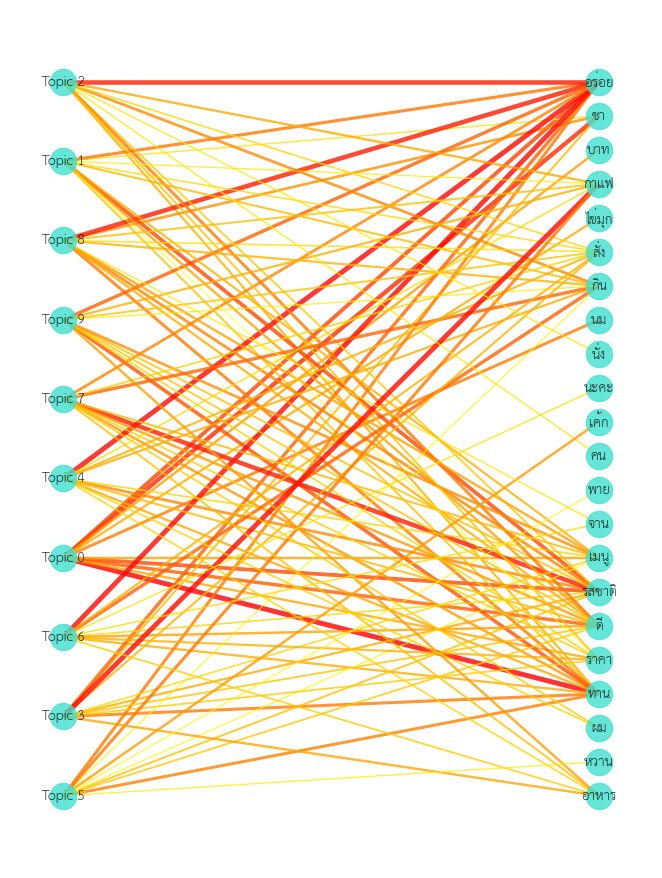

In [61]:
# nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
# node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
topic_nodes = [ f"Topic {i}" for i in range(num_topics)]
edgelist, weights = zip(*[((u,v), d['weight']) for u,v,d in G.edges(data=True)])


width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*4

labels_params = {'font_family': 'TH Sarabun New', 'alpha':.8, 'font_size':20}

plt.figure(figsize=(9,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
# pos = nx.spring_layout(G, k=5, weight='weight', iterations=80, seed=90, scale=2.5)
pos = nx.bipartite_layout(G, topic_nodes)
nx.draw(G, pos, with_labels=True, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        node_color='turquoise', node_size=700, 
        **labels_params)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

# plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()